# Analysis of the regularization term in forecasting

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns

import util
from sirds_model_visualization import calculate_performance
from util import calculate_confidence_interval

## Reading data

In [31]:
df_actuals = pd.read_csv('data/output/df_ts_epidemic_episodes.csv', index_col=0)
df_actuals.DATA = pd.to_datetime(df_actuals.DATA)
df_actuals = df_actuals.sort_values('DATA')

In [32]:
df_forecastings = pd.read_csv("data/output/df_sirds.csv")
df_forecastings.date = pd.to_datetime(df_forecastings.date)
df_forecastings = df_forecastings.sort_values(['outbreak', 'alpha', 'estimation', 'date'])

## Extracting measures: MAE, R2 and SSE

In [33]:
df_measures = df_forecastings[['outbreak', 'alpha', 'estimation']].drop_duplicates()

In [34]:
def extract_measures(df_estimation):
    df_actual = df_actuals[df_actuals.DATA.isin(df_estimation.date)]
    size_train_period = len(df_estimation[df_estimation.train_period])
    
    mae_fit, sse_D_fit, r2_D_fit, sse_Rt_fit, r2_Rt_fit, mae_predicton, sse_D_predicton, r2_D_predicton, sse_Rt_predicton, r2_Rt_predicton, mae_predicton_month_1, sse_D_predicton_month_1, r2_D_predicton_month_1, sse_Rt_predicton_month_1, r2_Rt_predicton_month_1, mae_predicton_month_2, sse_D_predicton_month_2, r2_D_predicton_month_2, sse_Rt_predicton_month_2, r2_Rt_predicton_month_2, mae_predicton_month_3, sse_D_predicton_month_3, r2_D_predicton_month_3, sse_Rt_predicton_month_3, r2_Rt_predicton_month_3 = calculate_performance(df_actual.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.round(6).values, df_estimation.D_new_deaths.values, df_actual['NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA'].round(6).values, df_estimation.reproduction_number_sird.values, size_train_period)

    return mae_fit, sse_D_fit, r2_D_fit, sse_Rt_fit, r2_Rt_fit, mae_predicton, sse_D_predicton, r2_D_predicton, sse_Rt_predicton, r2_Rt_predicton, mae_predicton_month_1, sse_D_predicton_month_1, r2_D_predicton_month_1, sse_Rt_predicton_month_1, r2_Rt_predicton_month_1, mae_predicton_month_2, sse_D_predicton_month_2, r2_D_predicton_month_2, sse_Rt_predicton_month_2, r2_Rt_predicton_month_2, mae_predicton_month_3, sse_D_predicton_month_3, r2_D_predicton_month_3, sse_Rt_predicton_month_3, r2_Rt_predicton_month_3

In [35]:
for index, item in df_measures.iterrows():
    df_forecasting = df_forecastings[(df_forecastings.outbreak == item.outbreak) & (df_forecastings.alpha == item.alpha) & (df_forecastings.estimation == item.estimation)]

    mae_fit, sse_D_fit, r2_D_fit, sse_Rt_fit, r2_Rt_fit, mae_predicton, sse_D_predicton, r2_D_predicton, sse_Rt_predicton, r2_Rt_predicton, mae_predicton_month_1, sse_D_predicton_month_1, r2_D_predicton_month_1, sse_Rt_predicton_month_1, r2_Rt_predicton_month_1, mae_predicton_month_2, sse_D_predicton_month_2, r2_D_predicton_month_2, sse_Rt_predicton_month_2, r2_Rt_predicton_month_2, mae_predicton_month_3, sse_D_predicton_month_3, r2_D_predicton_month_3, sse_Rt_predicton_month_3, r2_Rt_predicton_month_3 = extract_measures(df_forecasting)    

    df_measures.loc[index, 'mae_fit'] = mae_fit
    df_measures.loc[index, 'sse_D_fit'] = sse_D_fit
    df_measures.loc[index, 'r2_D_fit'] = r2_D_fit
    df_measures.loc[index, 'sse_Rt_fit'] = sse_Rt_fit
    df_measures.loc[index, 'r2_Rt_fit'] = r2_Rt_fit
    df_measures.loc[index, 'mae_predicton'] = mae_predicton
    df_measures.loc[index, 'sse_D_predicton'] = sse_D_predicton
    df_measures.loc[index, 'r2_D_predicton'] = r2_D_predicton
    df_measures.loc[index, 'sse_Rt_predicton'] = sse_Rt_predicton
    df_measures.loc[index, 'r2_Rt_predicton'] = r2_Rt_predicton
    df_measures.loc[index, 'mae_predicton_month_1'] = mae_predicton_month_1
    df_measures.loc[index, 'sse_D_predicton_month_1'] = sse_D_predicton_month_1
    df_measures.loc[index, 'r2_D_predicton_month_1'] = r2_D_predicton_month_1
    df_measures.loc[index, 'sse_Rt_predicton_month_1'] = sse_Rt_predicton_month_1
    df_measures.loc[index, 'r2_Rt_predicton_month_1'] = r2_Rt_predicton_month_1
    df_measures.loc[index, 'mae_predicton_month_2'] = mae_predicton_month_2
    df_measures.loc[index, 'sse_D_predicton_month_2'] = sse_D_predicton_month_2
    df_measures.loc[index, 'r2_D_predicton_month_2'] = r2_D_predicton_month_2
    df_measures.loc[index, 'sse_Rt_predicton_month_2'] = sse_Rt_predicton_month_2
    df_measures.loc[index, 'r2_Rt_predicton_month_2'] = r2_Rt_predicton_month_2
    df_measures.loc[index, 'mae_predicton_month_3'] = mae_predicton_month_3
    df_measures.loc[index, 'sse_D_predicton_month_3'] = sse_D_predicton_month_3
    df_measures.loc[index, 'r2_D_predicton_month_3'] = r2_D_predicton_month_3
    df_measures.loc[index, 'sse_Rt_predicton_month_3'] = sse_Rt_predicton_month_3
    df_measures.loc[index, 'r2_Rt_predicton_month_3'] = r2_Rt_predicton_month_3      

In [36]:
df_forecasting

,date,S,I,R,D,I_accumulated,D_new_deaths,reproduction_number_sird,I_new_cases,days_between_infections,case_fatality_probability,loss_immunity_in_days,train_period,outbreak,alpha,estimation
217395,2020-02-16,99999.999509,0.000491,0.000000,0.000000e+00,0.000491,NaN,2.524703,NaN,3.16869,0.000812,89.999999,True,8.0,10.0,4.0
217396,2020-02-17,99999.999335,0.000597,0.000069,5.614517e-08,0.000666,5.614517e-08,2.524703,0.000174,3.16869,0.000814,89.999999,True,8.0,10.0,4.0
217397,2020-02-18,99999.999128,0.000723,0.000150,1.232736e-07,0.000874,6.712845e-08,2.524703,0.000208,3.16869,0.000816,89.999999,True,8.0,10.0,4.0
217398,2020-02-19,99999.998878,0.000874,0.000247,2.046177e-07,0.001126,8.134409e-08,2.524703,0.000252,3.16869,0.000819,89.999999,True,8.0,10.0,4.0
217399,2020-02-20,99999.998577,0.001059,0.000364,3.034858e-07,0.001431,9.886808e-08,2.524703,0.000305,3.16869,0.000821,89.999999,True,8.0,10.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218465,2023-01-21,21277.279460,6425.829912,71770.217617,5.266730e+02,821619.923003,7.947754e-02,1.001829,804.151383,1.69961,0.000099,89.999999,False,8.0,10.0,4.0
218466,2023-01-22,21270.627338,6426.928374,71775.691776,5.267525e+02,822424.071709,7.950197e-02,1.001514,804.148706,1.69961,0.000099,89.999999,False,8.0,10.0,4.0
218467,2023-01-23,21264.028584,6427.777305,71781.362072,5.268320e+02,823228.217738,7.952641e-02,1.001201,804.146029,1.69961,0.000099,89.999999,False,8.0,10.0,4.0
218468,2023-01-24,21257.564601,6428.379178,71787.144640,5.269116e+02,824032.285783,7.954315e-02,1.000890,804.068045,1.69961,0.000099,89.999999,False,8.0,10.0,4.0


In [37]:
df_actual = df_actuals[df_actuals.DATA.isin(df_forecasting.date)]
size_train_period = len(df_forecasting[df_forecasting.train_period])

In [38]:
df_actual

,DATA,OBITOS_NOVOS_PAINEL,OBITOS_ACUMULADO_PAINEL,CASOS_NOVOS_PAINEL,CASOS_ACUMULADO_PAINEL,day_of_week,CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL,OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL,OBITOS_NOVOS_SIM,OBITOS_ACUMULADO_SIM,...,NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.025,NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIANA,NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.975,TAXA_FATALIDADE,TAXA_FATALIDADE_SRAG,NOVOS_OBITOS_MEDIA_MOVEL_7_DIAS_SRAG,NOVOS_CASOS_MEDIA_MOVEL_7_DIAS_SRAG,EPIDEMIC_EPISODE,ONSET_NUMERO_REPRODUCAO_EFETIVO_MEDIA,ONSET_TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS
0,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN
1,2020-02-17,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,7.500000,NaN,NaN,NaN
2,2020-02-18,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,7.666667,NaN,NaN,NaN
3,2020-02-19,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,7.000000,NaN,NaN,NaN
4,2020-02-20,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,7.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2022-12-27,230.0,693199.0,35898.0,36226287.0,1.0,32075.285714,131.285714,126.0,702158.0,...,NaN,NaN,NaN,0.317134,18.354832,124.000000,470.142857,3.0,NaN,8.0
1046,2022-12-28,363.0,693562.0,38434.0,36264721.0,2.0,31468.571429,157.285714,102.0,702260.0,...,NaN,NaN,NaN,0.211361,18.059182,118.571429,465.428571,3.0,NaN,8.0
1047,2022-12-29,172.0,693734.0,37694.0,36302415.0,3.0,29938.571429,154.571429,104.0,702364.0,...,NaN,NaN,NaN,0.226545,18.957897,116.428571,447.000000,3.0,NaN,8.0
1048,2022-12-30,119.0,693853.0,28866.0,36331281.0,4.0,29563.428571,158.571429,88.0,702452.0,...,NaN,NaN,NaN,0.189866,18.545888,111.142857,434.571429,3.0,NaN,8.0


In [39]:
size_train_period

985

## Analysing measures: MAE, R2, and SSE 

In [40]:
df_measures.groupby(['outbreak', 'alpha']).describe()[['mae_predicton']]

mae_predicton                                            \
                        count       mean        std       min       25%   
outbreak alpha                                                            
0.0      0.000           20.0   9.879002   6.301744  1.781325  4.248823   
         0.001           10.0  18.161523  10.120782  5.017104  9.441165   
         0.010           10.0  15.735698   9.372118  4.057601  8.681151   
         0.100           10.0  15.578493  11.386267  4.812380  6.514307   
         1.000           10.0  14.175417  13.986376  3.890739  4.587977   
         10.000          10.0  11.762572  14.518645  4.289511  4.497954   
1.0      0.000           20.0   0.120513   0.008244  0.097651  0.116204   
         0.001           10.0   0.752205   0.549725  0.163554  0.453845   
         0.010           10.0   7.836187   6.603303  0.824377  2.904452   
         0.100           10.0   1.797809   2.424182  0.602891  0.618294   
         1.000           10.0   3.048503   7.686032  0.586064  0.616327   
         10.000          10.0   2.424064   5.708100  0.573267  0.620944   
2.0      0.000           20.0   1.243361   1.414144  0.224791  0.394954   
         0.001           10.0   5.515508   4.365262  0.696175  1.472765   
         0.010           10.0  15.526398  10.160681  0.508099  8.220644   
         0.100           10.0   7.276029  13.472159  0.530816  0.596911   
         1.000           10.0   0.561609   0.034745  0.513866  0.527767   
         10.000          10.0   0.529928   0.026664  0.509988  0.514633   
3.0      0.000           20.0   0.696995   0.074244  0.607928  0.652034   
         0.001           10.0   2.453184   2.691835  0.682606  0.841116   
         0.010           10.0   1.902650   1.816982  0.721893  0.949077   
         0.100           10.0   0.907791   0.138450  0.736991  0.815565   
         1.000           10.0   0.839760   0.025610  0.804621  0.820158   
         10.000          10.0   0.828889   0.027713  0.803922  0.803922   
4.0      0.000           20.0   0.594458   0.157410  0.288031  0.450802   
         0.001           10.0   1.320186   0.999574  0.582434  0.752529   
         0.010           10.0   2.170377   2.634283  0.496285  0.918335   
         0.100           10.0   1.353523   1.650891  0.744829  0.765827   
         1.000           10.0   0.757060   0.003490  0.754572  0.756385   
         10.000          10.0   0.756042   0.000724  0.754638  0.756385   
5.0      0.000           20.0   0.445741   0.193261  0.203453  0.304937   
         0.001           10.0   1.274945   1.064810  0.521296  0.600950   
         0.010           10.0   0.819558   0.381370  0.271525  0.470734   
         0.100           10.0   0.773706   0.176364  0.404478  0.717042   
         1.000           10.0   1.504380   1.990944  0.525032  0.688036   
         10.000          10.0   3.198912   4.593624  0.609724  0.609724   
6.0      0.000           20.0   2.878892   5.586194  0.521524  0.959941   
         0.001           10.0   8.375189  11.535536  0.679558  0.999349   
         0.010            5.0   7.467484  13.811108  0.691734  1.053953   
         0.100            5.0   1.030736   0.177617  0.883435  0.904321   
         1.000            5.0  11.103285  22.307185  1.114415  1.114984   
         10.000           5.0   1.114872   0.000131  1.114759  1.114759   
7.0      0.000           20.0   0.667820   0.217367  0.453434  0.494858   
         0.001            5.0   9.978180  19.325652  0.629534  1.180197   
         0.010            5.0   1.314420   0.401233  0.621555  1.365991   
         0.100            5.0   1.164893   0.342567  0.786221  0.841835   
         1.000            5.0   3.012147   3.479372  1.454795  1.455276   
         10.000           5.0   1.455551   0.000639  1.454695  1.455520   
8.0      0.000           20.0   1.013634   0.466682  0.718764  0.881783   
         0.001            5.0   2.259824   3.066511  0.722884  0.879338   
         0.010            5.0   1.047663 

In [41]:
df_measures.groupby(['outbreak', 'alpha']).describe()[['mae_fit']]

mae_fit                                                     \
                  count      mean        std       min       25%       50%   
outbreak alpha                                                               
0.0      0.000     20.0  0.400630   0.029251  0.360626  0.377864  0.400308   
         0.001     10.0  0.394940   0.006570  0.385930  0.391122  0.394784   
         0.010     10.0  0.399379   0.035830  0.385554  0.385680  0.385710   
         0.100     10.0  0.456519   0.133247  0.385574  0.385682  0.386267   
         1.000     10.0  0.385697   0.000056  0.385589  0.385659  0.385697   
         10.000    10.0  0.385733   0.000041  0.385655  0.385741  0.385750   
1.0      0.000     20.0  0.059168   0.005262  0.052778  0.054583  0.058395   
         0.001     10.0  0.808766   0.056223  0.714698  0.767048  0.816384   
         0.010     10.0  1.000501   0.187305  0.721835  0.860097  0.982035   
         0.100     10.0  0.918677   0.207387  0.688111  0.784554  0.860481   
         1.000     10.0  0.985064   0.284996  0.890768  0.891292  0.891708   
         10.000    10.0  4.871588  12.562851  0.890926  0.891861  0.893601   
2.0      0.000     20.0  0.059301   0.002111  0.056470  0.057581  0.058933   
         0.001     10.0  0.664595   0.269442  0.374446  0.515059  0.561707   
         0.010     10.0  1.171629   0.350130  0.844504  0.928569  1.173797   
         0.100     10.0  1.603086   1.690774  0.835893  0.894292  1.010941   
         1.000     10.0  0.908773   0.069785  0.818489  0.851188  0.922259   
         10.000    10.0  0.885425   0.055662  0.850697  0.850697  0.850895   
3.0      0.000     20.0  0.070706   0.001549  0.068222  0.069466  0.070929   
         0.001     10.0  0.931390   0.302949  0.392431  0.703449  1.061010   
         0.010     10.0  0.985057   0.201739  0.602991  0.842512  1.050598   
         0.100     10.0  0.967573   0.284616  0.670650  0.781459  0.867352   
         1.000     10.0  0.851506   0.077148  0.776456  0.778933  0.831316   
         10.000    10.0  0.841811   0.082499  0.777609  0.777609  0.778507   
4.0      0.000     20.0  0.076466   0.002338  0.072130  0.074707  0.076574   
         0.001     10.0  0.945230   0.333187  0.503835  0.771728  0.907796   
         0.010     10.0  2.819627   3.139462  0.636351  1.193845  1.423647   
         0.100     10.0  2.480330   2.787165  0.910628  1.016742  1.244025   
         1.000     10.0  0.912798   0.080533  0.769156  0.937698  0.937698   
         10.000    10.0  0.904085   0.070863  0.768975  0.937698  0.937698   
5.0      0.000     20.0  0.099213   0.007770  0.088665  0.092909  0.096521   
         0.001     10.0  1.011982   0.264058  0.672483  0.792461  0.996677   
         0.010     10.0  1.126054   0.192677  0.746444  1.033138  1.107649   
         0.100     10.0  1.994032   1.334176  1.158885  1.209219  1.401172   
         1.000     10.0  2.012527   1.192342  1.194318  1.257674  1.352252   
         10.000    10.0  2.296458   1.703309  1.258020  1.262403  1.262403   
6.0      0.000     20.0  0.118084   0.025066  0.093907  0.097052  0.103096   
         0.001     10.0  1.994074   1.308454  0.745116  1.167371  1.368065   
         0.010      5.0  2.870466   2.301765  1.114183  1.138698  1.318591   
         0.100      5.0  1.471831   0.495308  0.903977  1.166350  1.432628   
         1.000      5.0  2.749365   3.773952  1.017469  1.061521  1.083593   
         10.000     5.0  1.044510   0.036179  1.017407  1.017470  1.019412   
7.0      0.000     20.0  0.145986   0.003998  0.140849  0.144033  0.144819   
         0.001      5.0  1.254868   0.332121  0.913784  1.124345  1.147047   
         0.010      5.0  1.268280   0.175485  1.062933  1.105352  1.349996   
         0.100      5.0  1.300879   0.101232  1.216372  1.227891  1.255297   
         1.000      5.0  2.978830   4.046687  1.076427  1.076890  1.101926   
         10.000     5.0  1.076568   0.000496  1.076277  1.076369  1.076369   
8.0      0.000     20.0  0.160937   0.

0.0


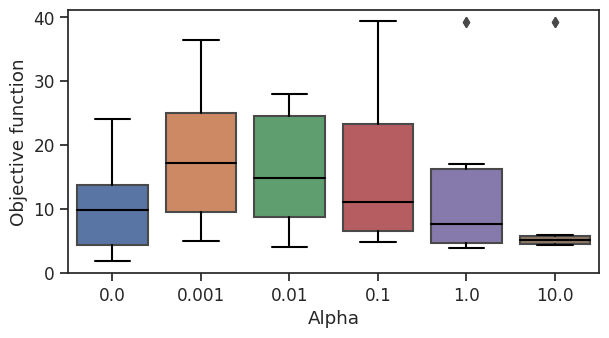

1.0


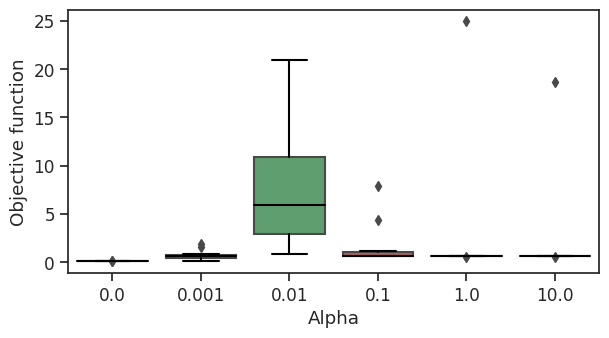

2.0


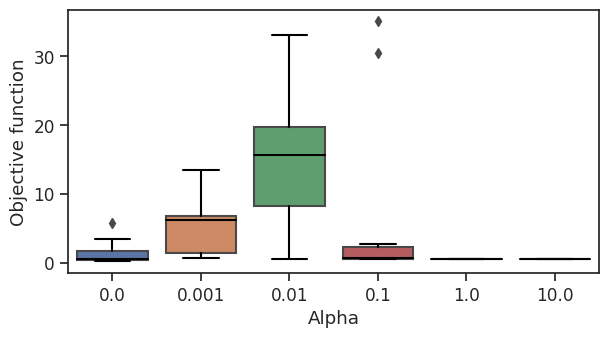

3.0


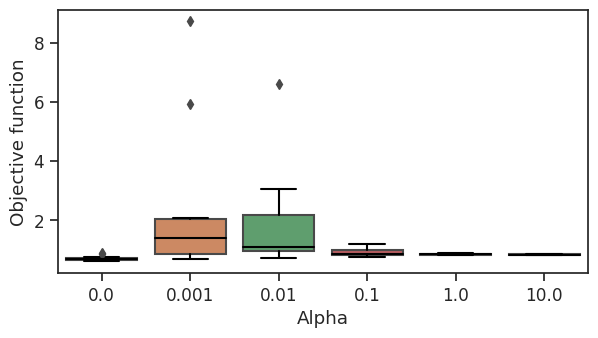

4.0


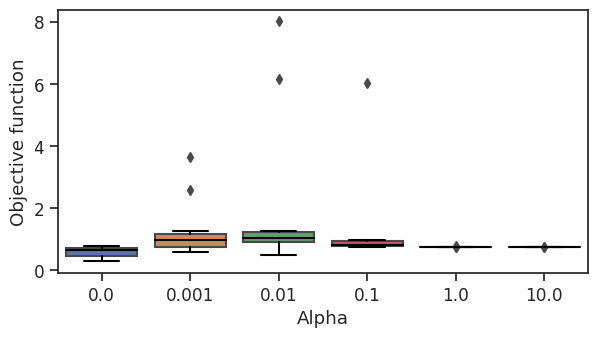

5.0


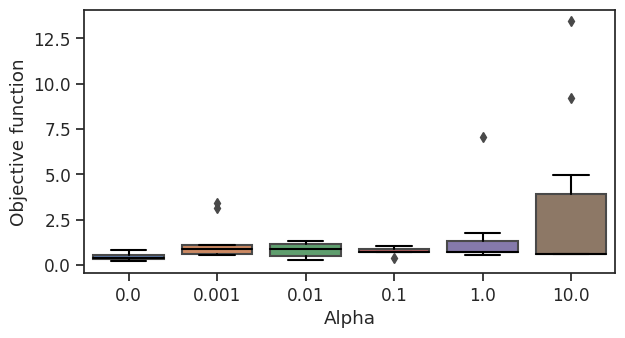

6.0


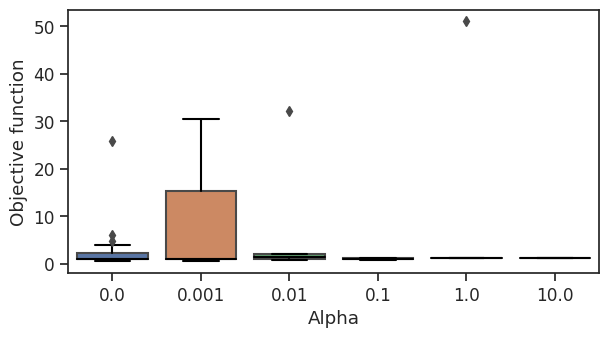

7.0


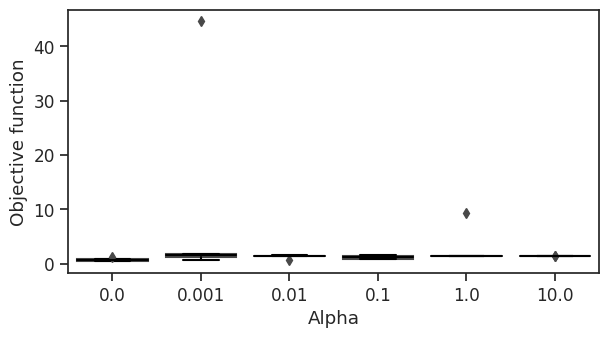

8.0


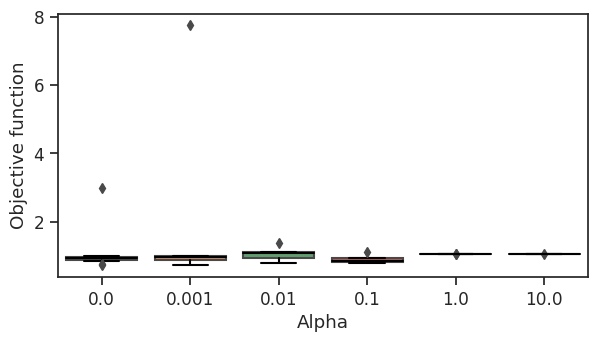

In [42]:
sns.set(font_scale=1.1)
sns.set_style("ticks")

for outbreak in df_measures.outbreak.drop_duplicates():    
    print(outbreak)
    
    df_measures_outbreak = df_measures[df_measures.outbreak == outbreak]
    
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(8.7)))
    
    sns.boxplot(x=df_measures_outbreak.alpha, y=df_measures_outbreak.mae_predicton)
    
    plt.ylabel('Objective function')
    plt.xlabel('Alpha')
    
    plt.setp(ax.lines, color='black')
    plt.setp(ax.artists, edgecolor = 'black', facecolor='white')
    
    # plt.savefig('images/boxplot_sirds_result.eps', bbox_inches="tight")
    plt.show()

## Defining confidence interval for alpha zero

In [60]:
df_forecastings_confidence_interval = pd.DataFrame()

for outbreak in df_forecastings.outbreak.unique():
    df_forecasting_outbreak = df_forecastings[(df_forecastings.alpha == 0) & (df_forecastings.outbreak == outbreak)]
    for date in df_forecasting_outbreak.date.unique(): 
        try:
            actual_death_rate = df_actuals[df_actuals.DATA == date].TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.values[0]
            
            train_period = df_forecasting_outbreak[df_forecasting_outbreak.date == date].train_period.values[0]
            
            estimated_new_deaths = df_forecasting_outbreak[df_forecasting_outbreak.date == date].D_new_deaths.values            
            estimated_new_deaths_mean = np.mean(estimated_new_deaths)            
            estimated_new_deaths_lower_bound, estimated_new_deaths_upper_bound = calculate_confidence_interval(estimated_new_deaths)
            
            if (actual_death_rate >=  estimated_new_deaths_lower_bound) & (actual_death_rate <= estimated_new_deaths_upper_bound):
                actual_inside_confidence_interval = True
            else:
                actual_inside_confidence_interval = False                            
                            
            new_item = {'outbreak': outbreak, 'date': date, 'train_period': train_period,  'estimated_new_deaths_mean': estimated_new_deaths_mean, 'estimated_new_deaths_lower_bound': estimated_new_deaths_lower_bound, 'estimated_new_deaths_upper_bound': estimated_new_deaths_upper_bound, 'actual_death_rate': actual_death_rate, 'actual_inside_confidence_interval': actual_inside_confidence_interval}
            
            df_forecastings_confidence_interval = pd.concat([df_forecastings_confidence_interval, pd.DataFrame.from_records([new_item])])
        except IndexError:
            pass

In [63]:
df_forecastings_confidence_interval

,outbreak,date,train_period,estimated_new_deaths_mean,estimated_new_deaths_lower_bound,estimated_new_deaths_upper_bound,actual_death_rate,actual_inside_confidence_interval
0,0.0,2020-02-16,True,NaN,NaN,NaN,0.000000,False
0,0.0,2020-02-17,True,0.000008,0.000007,0.000008,0.000000,False
0,0.0,2020-02-18,True,0.000009,0.000009,0.000010,0.000000,False
0,0.0,2020-02-19,True,0.000011,0.000011,0.000012,0.000000,False
0,0.0,2020-02-20,True,0.000013,0.000013,0.000014,0.000000,False
...,...,...,...,...,...,...,...,...
0,8.0,2022-12-27,False,0.046719,0.017253,0.103995,0.064583,True
0,8.0,2022-12-28,False,0.049002,0.017400,0.109557,0.059939,True
0,8.0,2022-12-29,False,0.051401,0.017536,0.117325,0.057829,True
0,8.0,2022-12-30,False,0.053899,0.017415,0.124464,0.055226,True


In [64]:
df_forecastings_confidence_interval.dropna().groupby(['outbreak', 'train_period', 'actual_inside_confidence_interval']).count()[['date']]

date
outbreak train_period actual_inside_confidence_interval      
0.0      False        False                                86
                      True                                  4
         True         False                                32
                      True                                  3
1.0      False        False                                86
                      True                                  4
         True         False                               108
                      True                                 20
2.0      False        False                                90
         True         False                               246
                      True                                 24
3.0      False        False                                90
         True         False                               310
                      True                                 20
4.0      False        False                                86
                      True                                  4
         True         False                               341
                      True                                 28
5.0      False        False                                63
                      True                                 27
         True         False                               385
                      True                                 73
6.0      False        False                                47
                      True                                 43
         True         False                               550
                      True                                137
7.0      False        False                                85
                      True                                  5
         True         False                               733
                      True                                 74
8.0      False        False                                53
                      True                                 12
         True         False                               886
                      True                                 98

In [77]:
percentual_error_trainning = df_forecastings_confidence_interval[df_forecastings_confidence_interval.train_period == True][['outbreak', 'estimated_new_deaths_mean', 'actual_death_rate']].dropna().groupby(['outbreak']).sum()
percentual_error_trainning['error'] = percentual_error_trainning.estimated_new_deaths_mean - percentual_error_trainning.actual_death_rate
percentual_error_trainning['percentual_error'] = (percentual_error_trainning.error / percentual_error_trainning.actual_death_rate) * 100 

In [78]:
percentual_error_trainning

,estimated_new_deaths_mean,actual_death_rate,error,percentual_error
outbreak,,,,
0.0,0.027521,0.026117,0.001405,5.378079
1.0,33.247000,33.503422,-0.256422,-0.765361
2.0,85.909038,85.765442,0.143595,0.167428
3.0,108.637909,108.684775,-0.046866,-0.043121
4.0,130.210288,130.068056,0.142232,0.109352
5.0,235.837459,236.383945,-0.546486,-0.231186
6.0,314.014622,313.785303,0.229319,0.073081
7.0,336.287843,334.935089,1.352754,0.403885
8.0,344.978982,343.011208,1.967774,0.573676


In [75]:
percentual_error_forecasting = df_forecastings_confidence_interval[df_forecastings_confidence_interval.train_period == False][['outbreak', 'estimated_new_deaths_mean', 'actual_death_rate']].dropna().groupby(['outbreak']).sum()
percentual_error_forecasting['error'] = percentual_error_forecasting.estimated_new_deaths_mean - percentual_error_forecasting.actual_death_rate
percentual_error_forecasting['percentual_error'] = (percentual_error_forecasting.error / percentual_error_forecasting.actual_death_rate) * 100 

In [76]:
percentual_error_forecasting

,estimated_new_deaths_mean,actual_death_rate,error,percentual_error
outbreak,,,,
0.0,329.318641,31.992893,297.325748,929.349376
1.0,38.621292,39.945546,-1.324254,-3.315147
2.0,84.136963,39.590201,44.546762,112.519665
3.0,35.446578,85.150345,-49.703767,-58.371774
4.0,55.124458,107.232707,-52.108249,-48.593615
5.0,42.926078,59.024400,-16.098322,-27.274012
6.0,55.362754,20.594714,34.768041,168.820219
7.0,9.131729,6.297287,2.834443,45.010537
8.0,1.529609,2.822143,-1.292534,-45.799750


In [82]:
NOISE = 0.000001

percentual_error_forecasting_by_months = pd.DataFrame()

df_predictions = df_forecastings_confidence_interval[df_forecastings_confidence_interval.train_period == False]
for outbreak in df_predictions.outbreak.unique():
    df_predictions_outbreak = df_predictions[df_predictions.outbreak == outbreak].reset_index(drop=True)
    for month, day_bounds in zip([1, 2, 3], [(0,30), (30,60), (60,90)]):
        df_predictions_outbreak_month = df_predictions_outbreak[day_bounds[0] : day_bounds[1]]
        total_actual = df_predictions_outbreak_month['actual_death_rate'].sum() + NOISE
        total_estimation = df_predictions_outbreak_month['estimated_new_deaths_mean'].sum() + NOISE
        error = total_estimation - total_actual
        percentual_error = (error / total_actual) * 100    
        
        new_item = {'outbreak': outbreak, 'month': month, 'total_actual': total_actual, 'total_estimation': total_estimation, 'error': error, 'percentual_error': percentual_error}
            
        percentual_error_forecasting_by_months = pd.concat([percentual_error_forecasting_by_months, pd.DataFrame.from_records([new_item])])

In [83]:
percentual_error_forecasting_by_months

,outbreak,month,total_actual,total_estimation,error,percentual_error
0,0.0,1,2.480166,5.324792,2.844626,114.694984
0,0.0,2,13.576397,185.694677,172.118280,1267.775799
0,0.0,3,15.936332,138.299174,122.362842,767.823118
0,1.0,1,15.006710,13.970835,-1.035875,-6.902743
0,1.0,2,14.117047,12.856828,-1.260219,-8.926930
0,1.0,3,10.821792,11.793632,0.971840,8.980397
0,2.0,1,8.879814,11.402719,2.522905,28.411689
0,2.0,2,14.039520,27.245207,13.205687,94.060817
0,2.0,3,16.670870,45.489040,28.818169,172.865418
0,3.0,1,16.670870,14.341014,-2.329856,-13.975610


## Saving data

In [84]:
df_measures.to_csv('data/output/df_sirds_measures.csv', index=False)
df_forecastings_confidence_interval.to_csv('data/output/df_forecastings_confidence_interval.csv', index=False)
percentual_error_trainning.to_csv('data/output/percentual_error_trainning.csv', index=False)
percentual_error_forecasting.to_csv('data/output/percentual_error_forecasting.csv', index=False)
percentual_error_forecasting_by_months.to_csv('data/output/percentual_error_forecasting_by_months.csv', index=False)

In [15]:
df_measures.head()

,outbreak,alpha,estimation,mae_fit,sse_D_fit,r2_D_fit,sse_Rt_fit,r2_Rt_fit,mae_predicton,sse_D_predicton,...,mae_predicton_month_2,sse_D_predicton_month_2,r2_D_predicton_month_2,sse_Rt_predicton_month_2,r2_Rt_predicton_month_2,mae_predicton_month_3,sse_D_predicton_month_3,r2_D_predicton_month_3,sse_Rt_predicton_month_3,r2_Rt_predicton_month_3
0,0.0,0.0,0.0,0.361982,9.287352e-08,0.944691,0.107822,-0.210090,3.536037,4.201386,...,1.495143,0.190114,-436.500307,0.392772,-51.030358,1.495143,0.190114,-436.500307,0.392772,-51.030358
126,0.0,0.0,1.0,0.385509,8.178817e-08,0.953000,0.173898,-0.951658,9.931291,23.475667,...,1.197654,0.129222,0.114518,0.420603,-54.717177,1.197654,0.129222,0.114518,0.420603,-54.717177
252,0.0,0.0,2.0,0.360749,9.214669e-08,0.945310,0.108822,-0.221312,2.004883,0.969468,...,1.455791,0.192029,-546.511491,0.334548,-43.317427,1.455791,0.192029,-546.511491,0.334548,-43.317427
378,0.0,0.0,3.0,0.386125,8.376702e-08,0.951347,0.169167,-0.898563,11.421441,31.066678,...,1.211413,0.125020,0.088540,0.458197,-59.697283,1.211413,0.125020,0.088540,0.458197,-59.697283
504,0.0,0.0,4.0,0.386301,8.383836e-08,0.951167,0.169192,-0.898845,24.048640,141.518420,...,1.342723,0.131273,0.107996,0.664163,-86.981496,1.342723,0.131273,0.107996,0.664163,-86.981496


In [16]:
df_measures.shape

(560, 28)

In [66]:
df_forecastings_confidence_interval.shape

(4862, 8)